In [93]:
import pandas as pd # data processing, CSV file I/O (read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # for statistical data visualization

In [94]:
dataset = pd.read_csv('task_3a_sample_data.csv', delimiter='\t')

In [95]:
dataset.shape

(50, 4)

In [96]:
dataset.head()

,public_id,title,text,our rating
0,f2182a54,HUGE! Attorney Sidney Powell CONFIRMS Alleged ...,Last week Rep. Louie Gohmert told Chris Salced...,FALSE
1,c5175d8d,Paul Ryan’s Worst Ally - The New York Times,WHATEVER drama plays out when Republicans meet...,TRUE
2,392886ea,Antifa gearing up for false flag violence disg...,With merchants in Democrat-run cities boarding...,FALSE
3,bc6d5d55,Remarks by President Biden on the Administrati...,State Dining Room 4:22 P.M. EST THE PRESIDEN...,partially false
4,b8437efb,BOMBSHELL: Covid-19 infection rate may be 440%...,(Natural News) A 2012 study published in the j...,FALSE


In [97]:
col_names = dataset.columns

col_names

Index(['public_id', 'title', 'text', 'our rating'], dtype='object')

In [98]:
# check distribution of 'our rating' column

dataset['our rating'].value_counts()

FALSE              21
partially false    18
TRUE               11
Name: our rating, dtype: int64

In [99]:
# view percentage distribution of 'our rating' column

dataset['our rating'].value_counts()/np.float(len(dataset))

FALSE              0.42
partially false    0.36
TRUE               0.22
Name: our rating, dtype: float64

In [100]:
# view summary dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   public_id   50 non-null     object
 1   title       50 non-null     object
 2   text        50 non-null     object
 3   our rating  50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [101]:
# check missing values

dataset.isnull().sum()

public_id     0
title         0
text          0
our rating    0
dtype: int64

In [102]:
dataset.describe()

,public_id,title,text,our rating
count,50,50,50,50
unique,50,50,50,3
top,72d48555,Canadian Govt Publishes Bid Request For “Progr...,"“America will never be a socialist country,” P...",FALSE
freq,1,1,1,21


In [103]:
X = dataset.drop(columns=['our rating'])

y = dataset['our rating']

X['total'] = X['title'] + ' ' + X['text']

In [104]:
words = X.copy()

In [105]:
import nltk

from nltk.corpus import stopwords

nltk.download('stopwords')

nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rares.radu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rares.radu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [114]:
import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
corpus = []
corpus_test = []

for i in range(len(words)):
    review = re.sub('[^a-zA-Z]', ' ', words['total'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

X = tfidf_vec.fit_transform(corpus).toarray()

In [116]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [117]:
from sklearn import metrics
from sklearn.svm import SVC
svc = SVC(kernel='linear', gamma='auto')

svc.fit(X_train, y_train)

prediction = svc.predict(X_test)

In [118]:
report = metrics.classification_report(y_test, prediction, output_dict=True)

report

{'FALSE': {'precision': 1.0,
  'recall': 0.6666666666666666,
  'f1-score': 0.8,
  'support': 6},
 'TRUE': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1},
 'partially false': {'precision': 0.4,
  'recall': 0.6666666666666666,
  'f1-score': 0.5,
  'support': 3},
 'accuracy': 0.6,
 'macro avg': {'precision': 0.4666666666666666,
  'recall': 0.4444444444444444,
  'f1-score': 0.43333333333333335,
  'support': 10},
 'weighted avg': {'precision': 0.72,
  'recall': 0.6,
  'f1-score': 0.6300000000000001,
  'support': 10}}

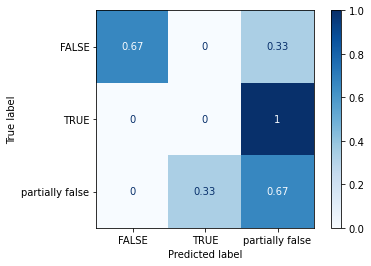

In [121]:
from sklearn.metrics import plot_confusion_matrix
cm = metrics.plot_confusion_matrix(svc, X_test, y_test, cmap=plt.cm.Blues, normalize='true')